# machine learning model to predict theaggregate rating of a restaurant based on other features.

## Step 1: Data Preprocessing

### Handle Missing Values
### Encode Categorical Variables
### Scale Numerical Features
### Split the Data into Training and Testing Sets

In [1]:
#importing modules
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


In [2]:
# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

In [3]:
# Fill missing values in 'Cuisines' column with 'Unknown'
data['Cuisines'].fillna('Unknown', inplace=True)

C:\Users\racer\AppData\Local\Temp\ipykernel_15728\1231011287.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cuisines'].fillna('Unknown', inplace=True)


In [4]:
# Define categorical and numerical features
categorical_features = [
    'City', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
    'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text'
]
numerical_features = ['Longitude', 'Latitude', 'Average Cost for two', 'Votes']

In [5]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [6]:
# Separate features and target variable
X = data.drop(columns=['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose', 'Aggregate rating'])
y = data['Aggregate rating']

In [7]:
# Apply the preprocessing pipeline
X_preprocessed = preprocessor.fit_transform(X)

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

## Step 2: Select and Train a Regression Algorithm

### We'll choose Linear Regression

In [9]:
#import sklearn linear model
from sklearn.linear_model import LinearRegression

In [10]:
# Initialize the Linear Regression model
model = LinearRegression()

In [11]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

## Step 3: Evaluate the Model's Performance

## We'll use Mean Squared Error (MSE) and R-squared (R²) as the evaluation metrics.

In [12]:
#importing sklearn metrics 
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [14]:
# Calculate Mean Squared Error (MSE) and R-squared (R²) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
# Display the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²) score: {r2}')

Mean Squared Error (MSE): 0.03459612236689381
R-squared (R²) score: 0.9848003226057335


## Step 4: Interpret the Model's Results


### Analyze the most influential features affecting restaurant ratings.

In [16]:
#importing modules 
import numpy as np

In [17]:
# Get the feature names after preprocessing
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))


In [18]:
# Get the coefficients of the linear regression model
coefficients = model.coef_

In [19]:
# Create a DataFrame for the feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

In [20]:
# Sort the features by their importance
feature_importances = feature_importances.sort_values(by='Coefficient', ascending=False)


In [21]:
# Display the top 5 most influential features
print(feature_importances.head(5))

                                          Feature  Coefficient
1997                        Rating text_Excellent     0.786133
1990                      Rating color_Dark Green     0.786133
2001                        Rating text_Very Good     0.561403
1991                           Rating color_Green     0.561403
1826  Cuisines_Seafood, Filipino, Asian, European     0.397341


## Visualizing Influential Features

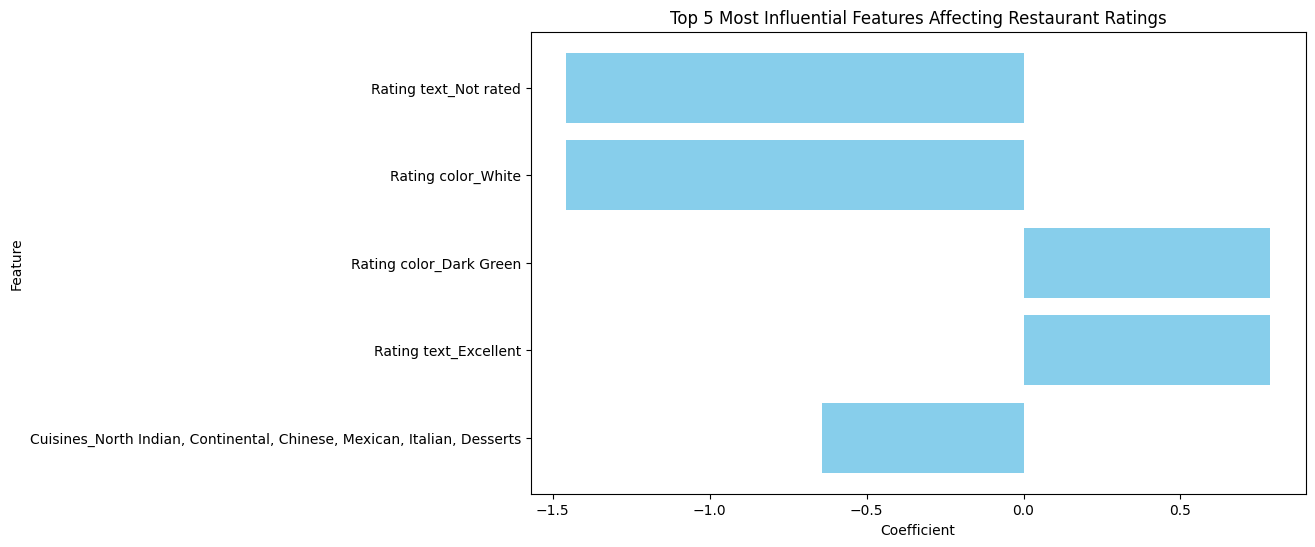

In [22]:
import matplotlib.pyplot as plt

# Sort the features by their absolute coefficient values
feature_importances['Absolute Coefficient'] = feature_importances['Coefficient'].abs()
feature_importances = feature_importances.sort_values(by='Absolute Coefficient', ascending=False)

# Select the top 10 most influential features
top_features = feature_importances.head(5)

# Plot the top 10 most influential features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 5 Most Influential Features Affecting Restaurant Ratings')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()


## Saving the Trained Model

In [23]:
import joblib
joblib.dump(model, 'restaurant_rating_model.joblib')
joblib.dump(preprocessor, 'preprocessor.joblib')

['preprocessor.joblib']

## Make Predictions Using New Data

In [26]:
#define new data 
new_data = pd.DataFrame({
    'City': ['Makati City'],
    'Cuisines': ['Japanese'],
    'Currency': ['Botswana Pula(P)'],
    'Has Table booking': ['Yes'],
    'Has Online delivery': ['No'],
    'Is delivering now': ['No'],
    'Switch to order menu': ['No'],
    'Rating color': ['Dark Green'],
    'Rating text': ['Excellent'],
    'Longitude': [121.027535],
    'Latitude': [14.565443],
    'Average Cost for two': [1500],
    'Votes': [300]
})

In [27]:
# Preprocess the new data data
new_data_preprocessed = preprocessor.transform(new_data)


In [28]:
# Load the saved model
loaded_model = joblib.load('restaurant_rating_model.joblib')

In [29]:
# Make prediction on the new data
new_rating_pred = loaded_model.predict(new_data_preprocessed)

In [30]:
# Display the prediction
print(f'Predicted Aggregate Rating for new Data: {new_rating_pred[0]}')

Predicted Aggregate Rating for new Data: 4.483436573523554
